In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
from matplotlib import pyplot as plt
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units
from scipy.stats import pearsonr

C:\Users\anask\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
wind = pd.read_csv("pin_cop_bu_wind.csv",index_col = [0])
rain = pd.read_csv("pin_cop_bu_rain.csv", index_col = [0])
air = pd.read_csv("pin_cop_bu_air_conditions.csv", index_col = [0])
temp = pd.read_csv("pin_cop_bu_temperature.csv", index_col = [0])
ground_temp = pd.read_csv("pin_cop_bu_soil.csv", index_col = [0])
radiation = pd.read_csv("pin_cop_bu_rad.csv", index_col = [0])

In [3]:
wind.describe()

,Wind speed.mean,Wind direction.mean,u10,v10
count,1370.000000,1370.000000,1372.000000,1372.000000
mean,1.149913,154.023857,0.369024,-0.377688
std,1.506303,79.792212,1.800846,1.966946
min,0.000000,17.041667,-6.671571,-7.799611
25%,0.184754,78.143750,-0.840667,-1.624982
50%,0.604861,141.014583,0.416887,-0.360776
75%,1.497222,222.304861,1.574656,1.106756
max,13.263889,359.500000,6.238322,6.657658


In [4]:
wind["u_v_speed"] = np.sqrt(wind["u10"]*wind["u10"] + wind["v10"]*wind["v10"])

In [5]:
u10 = list(wind["u10"])
v10 = list(wind["v10"])
u_v_wind_dir = []


for i in range(len(u10)):
    direction = math.degrees(math.atan2(float(v10[i]), float(u10[i])))
    
    if (direction<0):
        u_v_dir_helper = direction+360
    else:
        u_v_dir_helper = direction
    
    u_v_wind_dir.append(u_v_dir_helper)
    
wind["u_v_wind_dir"]  = u_v_wind_dir
wind

,Wind speed.mean,Wind direction.mean,u10,v10,u_v_speed,u_v_wind_dir
0,0.620833,64.497222,0.461768,-2.102380,2.152494,282.387767
1,0.725000,167.265278,1.968419,1.272692,2.344017,32.884918
2,3.127778,90.947222,1.553551,0.988231,1.841229,32.460892
3,7.358333,49.526389,3.608592,-3.667567,5.145190,314.535618
4,8.995833,46.416667,2.102458,-5.819141,6.187304,289.864810
...,...,...,...,...,...,...
1367,0.122388,199.346269,-0.480898,0.364280,0.603293,142.856069
1368,0.256000,237.136000,-0.722615,1.419895,1.593196,116.972499
1369,0.292308,217.430769,-2.118742,1.447393,2.565933,145.661545
1370,0.033333,235.558333,-1.471208,1.611910,2.182363,132.387053


In [6]:
wind_calculated = wind[["Wind speed.mean", "Wind direction.mean", "u_v_speed", "u_v_wind_dir"]]

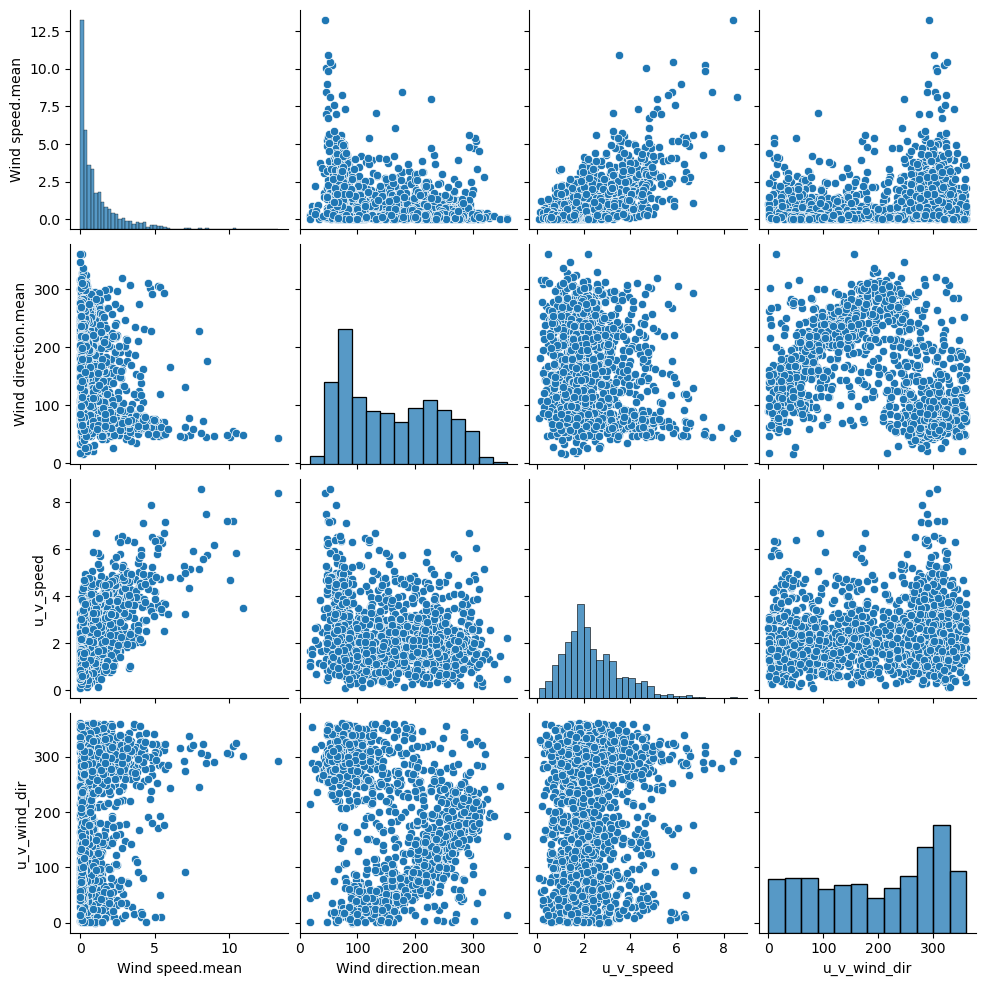

In [7]:
sns.pairplot(data = wind_calculated)

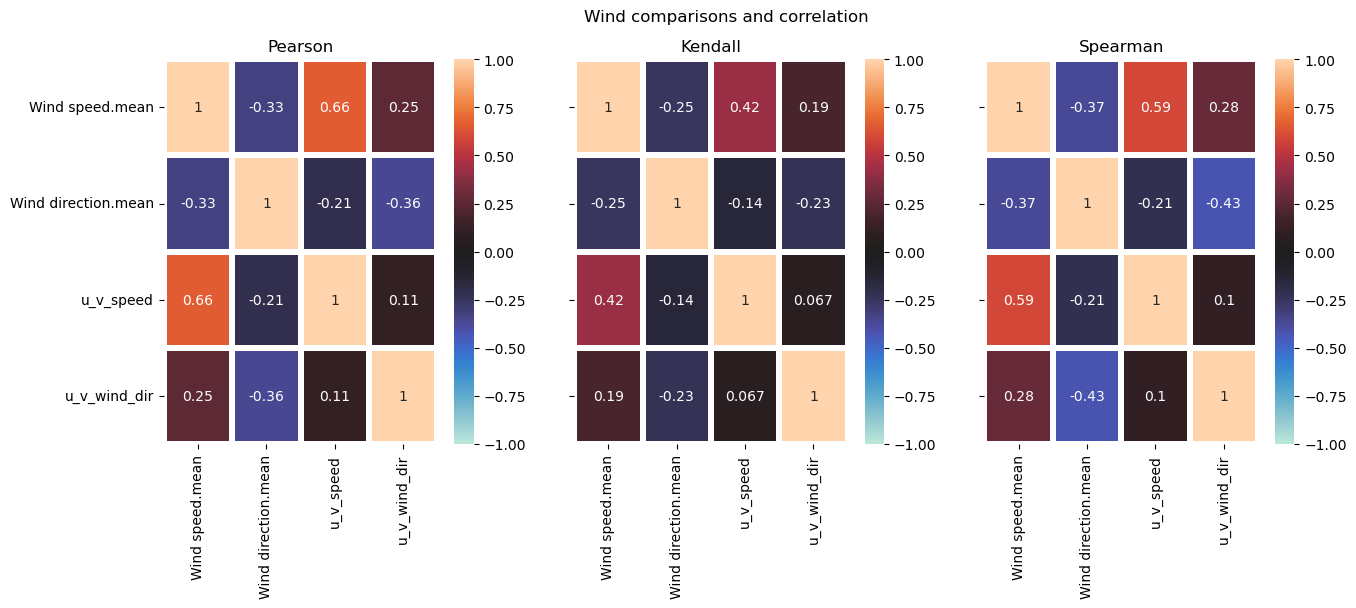

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Wind comparisons and correlation')

sns.heatmap(wind_calculated.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(wind_calculated.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(wind_calculated.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")
plt.show()

In [9]:
dew = np.array(air["d2m"])
tmp = np.array(air["t2m"])
humidity = []
for i in range(len(dew)):
    humidity.append(float(relative_humidity_from_dewpoint(tmp[i] * units.degC, dew[i] * units.degC))*100)
air["humidity"] = humidity
air.describe()

,Air moisture.mean,d2m,t2m,humidity
count,1370.000000,1372.000000,1372.000000,1372.000000
mean,92.320202,7.651486,14.208321,68.310103
std,11.869998,7.038668,8.894702,19.461551
min,39.745833,-11.364600,-5.981800,15.209186
25%,87.736806,1.761100,7.484298,51.102308
50%,100.000000,8.195230,14.127925,72.316831
75%,100.000000,13.617715,20.403593,85.343481
max,100.000000,20.923000,34.482800,100.000445


In [10]:
sns.pairplot(data = air)

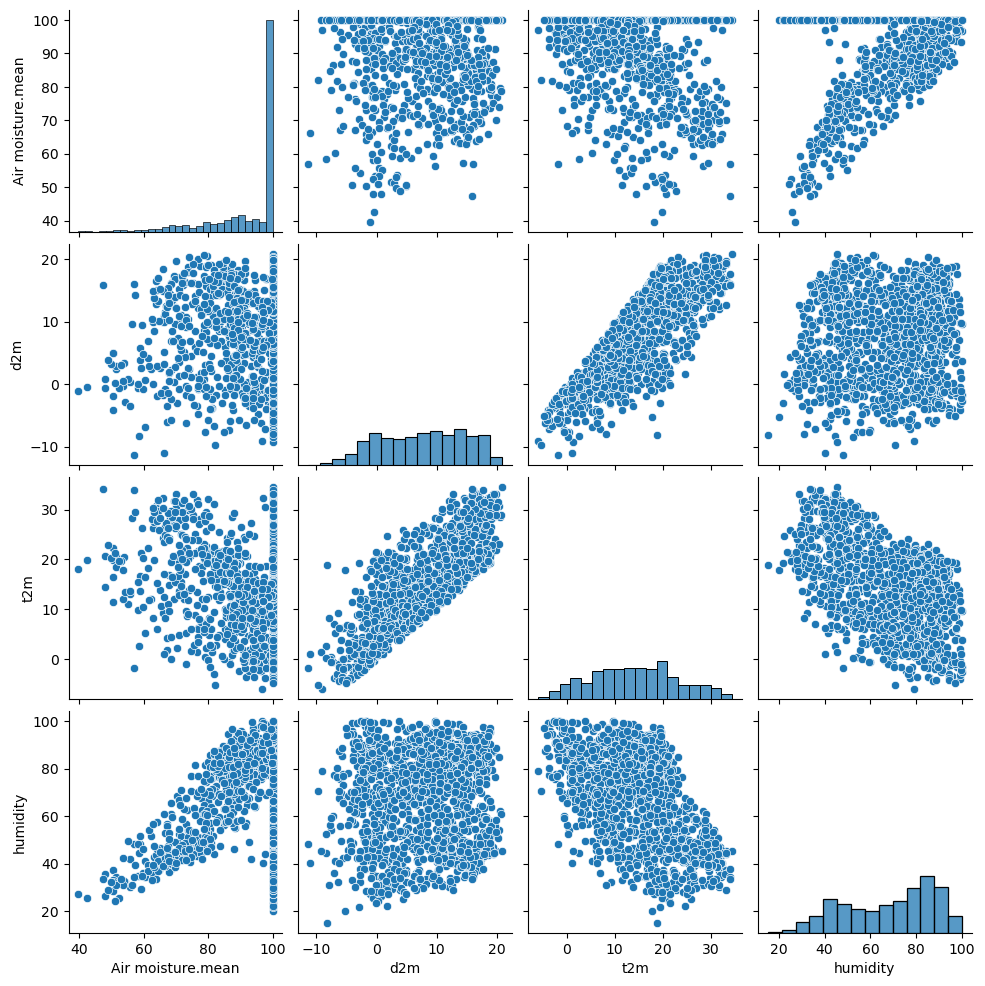

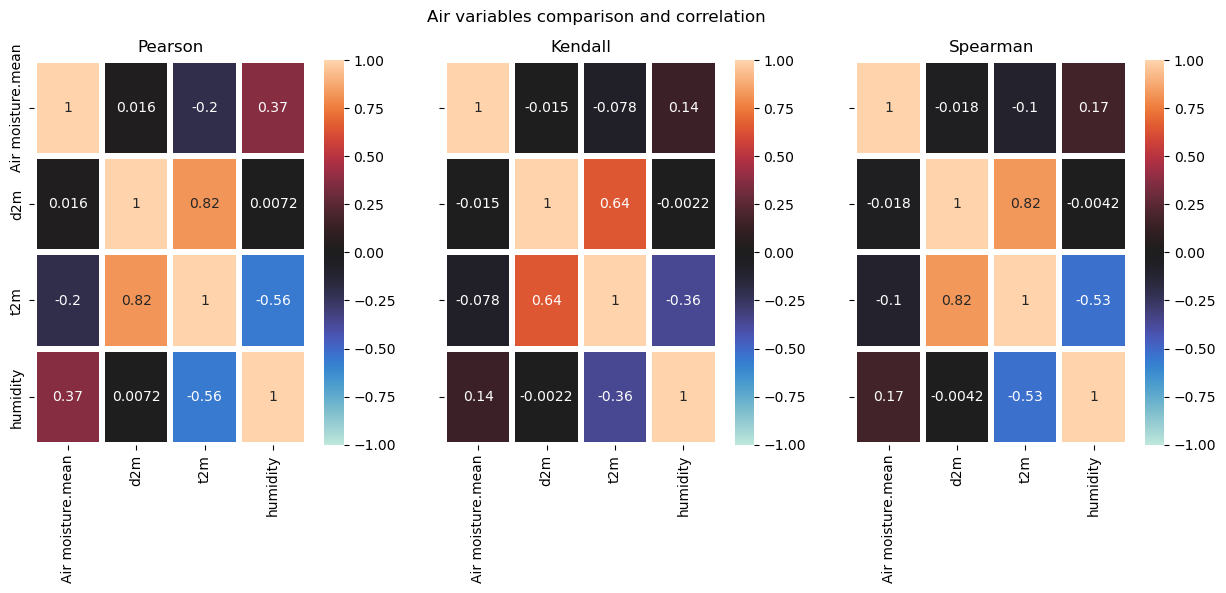

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Air variables comparison and correlation')

sns.heatmap(air.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(air.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(air.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")
plt.show()

In [12]:
rain.describe()

,Rainfall.mean,tcrw
count,1370.000000,1.372000e+03
mean,0.013213,7.478076e-03
std,0.045437,3.816299e-02
min,0.000000,0.000000e+00
25%,0.000000,2.980000e-08
50%,0.000000,2.980000e-08
75%,0.001389,9.917580e-04
max,0.618056,6.695927e-01


In [13]:
sns.pairplot(data = rain)

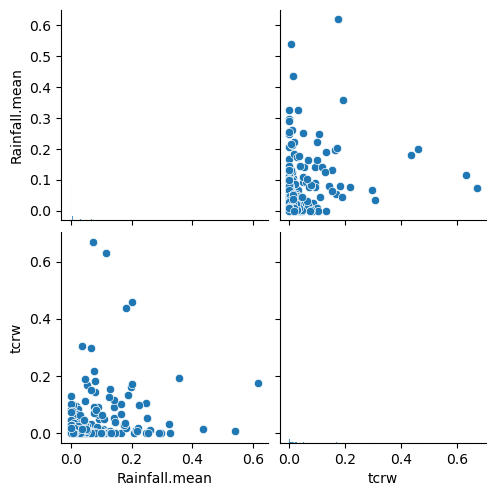

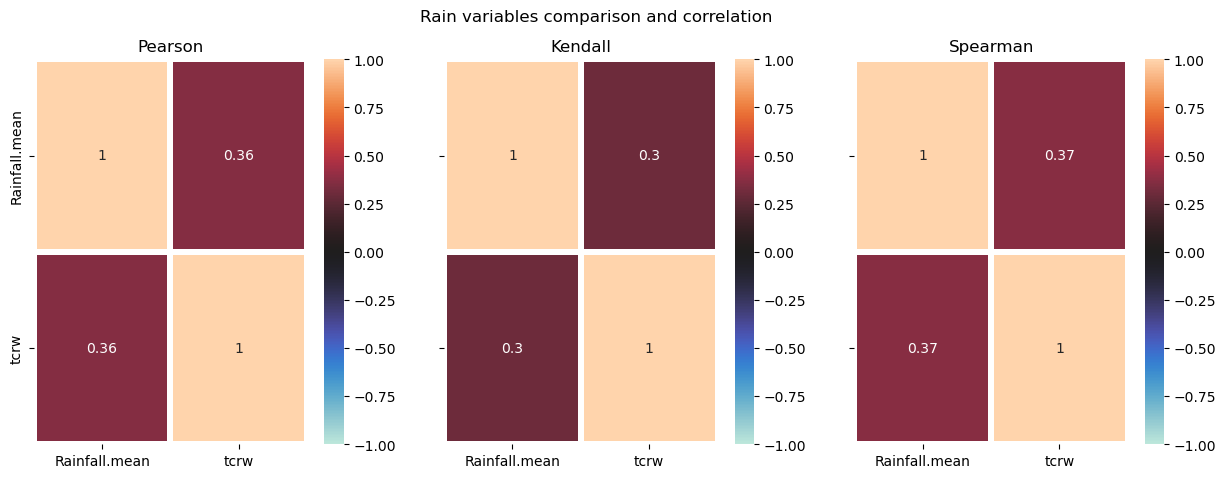

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Rain variables comparison and correlation')

sns.heatmap(rain.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(rain.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(rain.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")
plt.show()

In [15]:
temp.describe()

,Air temperature.mean,t2m
count,1370.000000,1372.000000
mean,23.143487,14.208321
std,35.338367,8.894702
min,-5.119444,-5.981800
25%,6.677431,7.484298
50%,12.932639,14.127925
75%,20.219792,20.403593
max,128.900000,34.482800


In [16]:
sns.pairplot(data = temp)

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Temperature variables comparison and correlation')

sns.heatmap(temp.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(temp.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(temp.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")

Text(0.5, 1.0, 'Spearman')

In [18]:
ground_temp.describe()

,Ground temperature.mean,skt
count,1370.000000,1372.000000
mean,13.626788,14.815215
std,7.137283,9.919695
min,1.800000,-7.463480
25%,7.682639,7.207698
50%,13.619444,14.616965
75%,19.019792,21.333980
max,71.231944,39.038960


In [19]:
sns.pairplot(data = ground_temp)

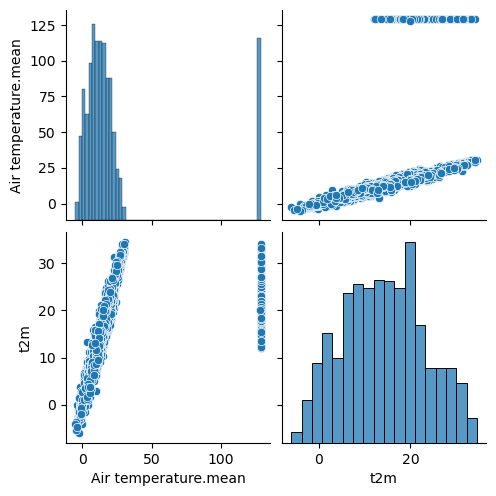

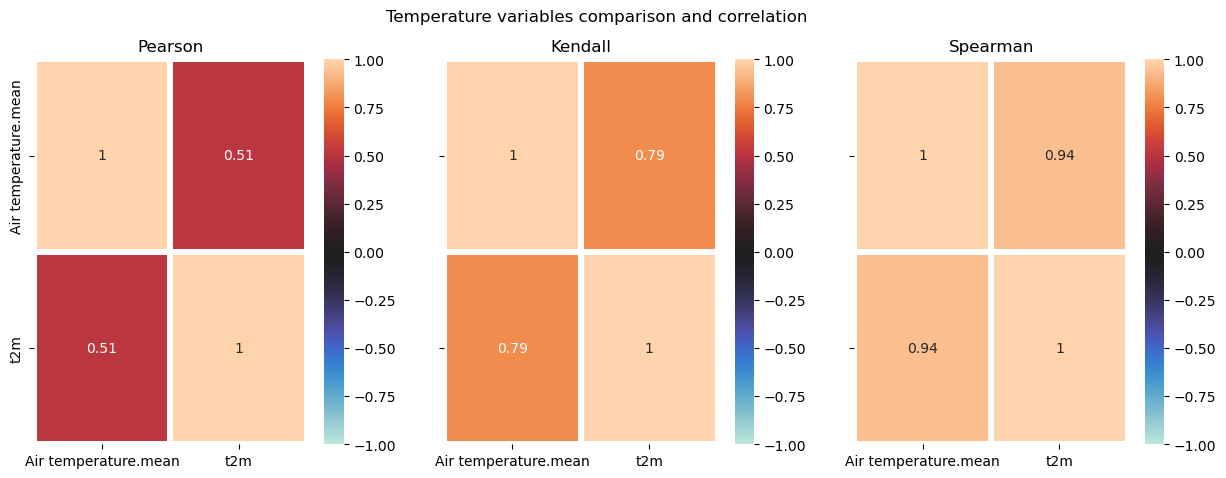

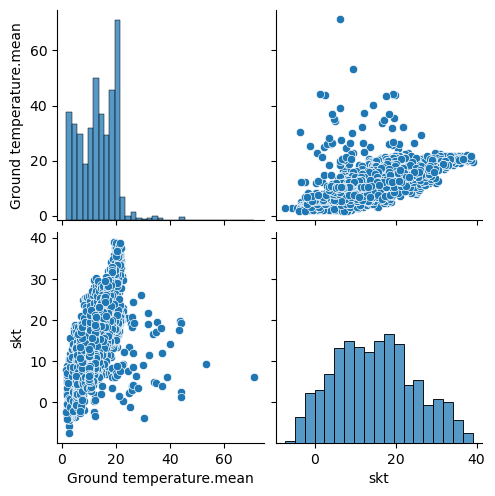

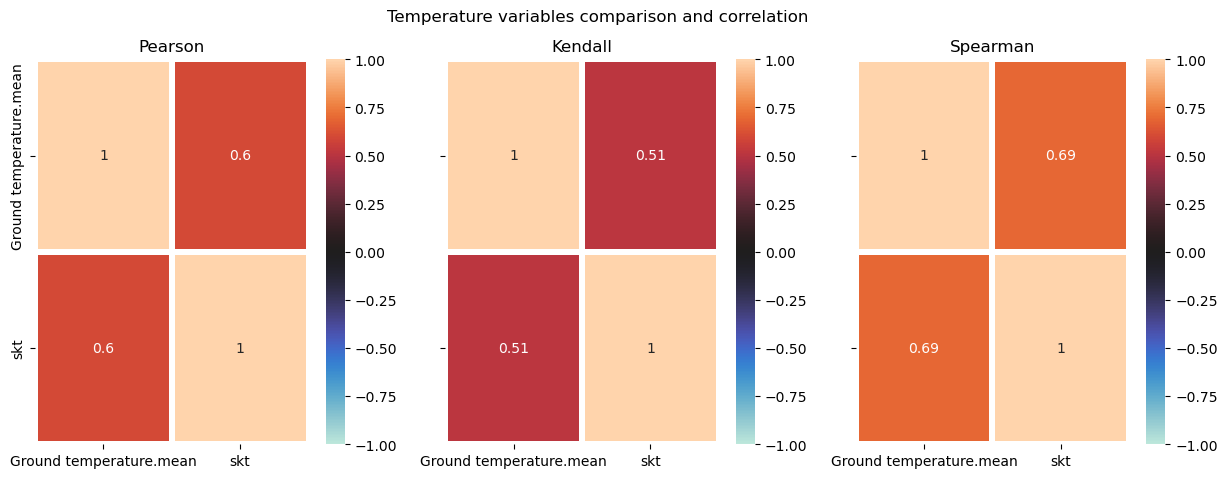

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Temperature variables comparison and correlation')

sns.heatmap(ground_temp.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(ground_temp.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(ground_temp.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")
plt.show()

In [21]:
radiation.describe()

,cdir_real,Global radiation.mean
count,1372.000000,1370.000000
mean,180.712148,111.579167
std,235.012385,66.118417
min,0.000000,0.503704
25%,0.000000,53.804861
50%,40.633380,107.161111
75%,247.854468,166.574306
max,763.449907,271.936111


In [22]:
radiation = radiation[radiation["cdir_real"] != 0]
radiation

,cdir_real,Global radiation.mean
1,238.623963,49.363889
3,241.245185,37.544444
5,244.355694,36.684722
7,245.602222,20.720833
9,234.604769,21.736111
...,...,...
1363,97.597667,28.001389
1365,97.700296,21.018056
1367,94.598333,15.568657
1369,94.107940,122.476923


In [23]:
sns.pairplot(data = radiation)

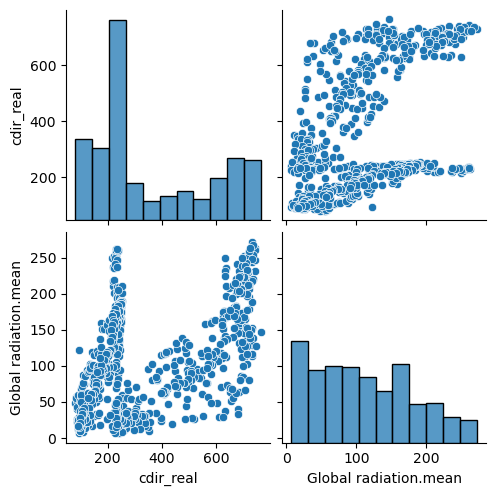

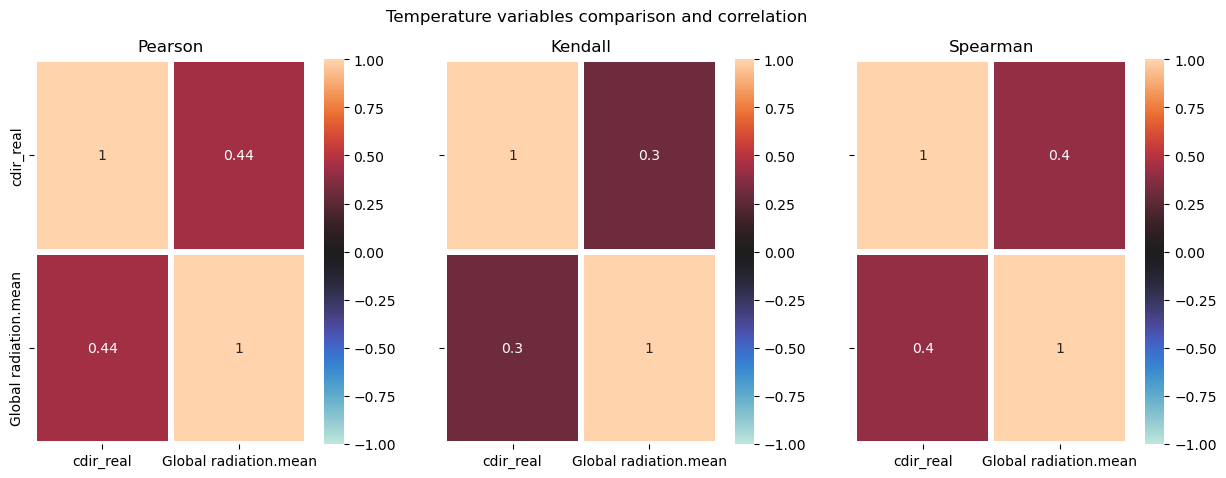

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Temperature variables comparison and correlation')

sns.heatmap(radiation.corr(method='pearson'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[0])
axes[0].set_title("Pearson")

sns.heatmap(radiation.corr(method='kendall'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[1])
axes[1].set_title("Kendall")

sns.heatmap(radiation.corr(method='spearman'), vmin=-1, vmax=1, center=0, annot=True, linewidth=4, ax=axes[2])
axes[2].set_title("Spearman")
plt.show()

In [25]:
wind.to_csv("pin_cop_bu_wind_web.csv")
rain.to_csv("pin_cop_bu_rain_web.csv")
air.to_csv("pin_cop_bu_air_web.csv")
temp.to_csv("pin_cop_bu_temp_web.csv")
ground_temp.to_csv("pin_cop_bu_temp_ground_web.csv")
radiation.to_csv("pin_cop_bu_radiation_web.csv")

In [26]:
from scipy import stats

def coefficients(df, col1, col2, alpha):
    corr_persons = stats.pearsonr(df[col1], df[col2])
    print('2-tailed p-value Pearsons: '+ str(corr_persons[1]))
    if corr_persons[1] < (float(alpha)/2):
        print('There is a significant correlation between column1 and column2')
    else:
        print('There is no significant correlation between column1 and column2')
    corr_kendall = stats.kendalltau(df[col1], df[col2])
    print('2-tailed p-value Kendall: ' + str(corr_kendall[1]))
    if corr_kendall[1] < (float(alpha)/2):
        print('There is a significant correlation between column1 and column2')
    else:
        print('There is no significant correlation between column1 and column2')
    corr_spearmans = stats.spearmanr(df[col1], df[col2])
    print('2-tailed p-value Spearman: ' + str(corr_spearmans[1]))
    if corr_spearmans[1] < (float(alpha)/2):
        print('There is a significant correlation between column1 and column2')
    else:
        print('There is no significant correlation between column1 and column2')
    

In [34]:
def lin_reg(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    return stats.linregress(x[mask], y[mask])

In [35]:
slope, intercept, r_value, p_value, std_err = lin_reg(wind["Wind speed.mean"], wind["u_v_speed"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 0.5676482455110982
intercept: 1.7347623562297028
r_value: 0.6607592084976294
p_value: 1.1766476081960343e-172
std_err: 0.017434134631019567


In [36]:
slope, intercept, r_value, p_value, std_err = lin_reg(wind["Wind direction.mean"], wind["u_v_wind_dir"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: -0.497189158338219
intercept: 273.96583311431834
r_value: -0.3645580091847597
p_value: 2.561293196472063e-44
std_err: 0.0343357006324424


In [37]:
slope, intercept, r_value, p_value, std_err = lin_reg(rain["Rainfall.mean"], rain["tcrw"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 0.3056127298731286
intercept: 0.0034507866003413096
r_value: 0.3636048748031505
p_value: 4.4387212499636353e-44
std_err: 0.02116929471426565


In [38]:
slope, intercept, r_value, p_value, std_err = lin_reg(air["Air moisture.mean"], air["humidity"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 0.6097554381235694
intercept: 12.078326065207179
r_value: 0.37298032569314665
p_value: 1.831898500396256e-46
std_err: 0.041010914224763904


In [39]:
slope, intercept, r_value, p_value, std_err = lin_reg(temp["Air temperature.mean"], temp["t2m"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 0.1292662751543006
intercept: 11.210879324802558
r_value: 0.5132721582254142
p_value: 6.160249656629116e-93
std_err: 0.005843810096626232


In [40]:
slope, intercept, r_value, p_value, std_err = lin_reg(ground_temp["Ground temperature.mean"], ground_temp["skt"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 0.8276090167411523
intercept: 3.5295112218043165
r_value: 0.5951706250451723
p_value: 4.495175149729717e-132
std_err: 0.030212054360095317


In [41]:
slope, intercept, r_value, p_value, std_err = lin_reg(radiation["Global radiation.mean"], radiation["cdir_real"])
print("slope:", slope)
print("intercept:", intercept)
print("r_value:", r_value)
print("p_value:", p_value)
print("std_err:", std_err)

slope: 1.3604768289636762
intercept: 209.92841288691685
r_value: 0.44471094288104396
p_value: 1.5870794949959297e-34
std_err: 0.1049231171933355
